**Χρησιμοποιώντας το ίδιο dataset, να υλοποιηθούν και να απαντηθούν τα παρακάτω ερωτήματα.**

Επαναλαμβάνω την ίδια διαδικασία ανάγνωσης του εγγράφου για τον διαχωρισμό των δεδομένων από τις ετικέτες.




In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

# Πρέπει να αλλάξει ανάλογα με την θέση του αρχείου Data_ex1 στο Google Drive
# Διαφορετικά να βγει από σχόλιο η τελευταία γραμμή του κελιού
path_to_data = '/content/gdrive/MyDrive/Colab Notebooks/Pattern Recognition/HW 03/seeds_dataset.txt'

import numpy as np
global file
file = np.loadtxt(path_to_data, dtype=float, encoding=None, delimiter="\t")

del path_to_data

# Εάν θέλουμε να ανεβάσουμε χειροκίνητα το αρχείο Data_ex1.txt
# file = np.loadtxt('seeds_dataset.txt', dtype=float, encoding=None, delimiter=",")

data   = file[:, :-1]
labels = file[:, -1]
del file

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **ΕΡΩΤΗΜΑ Α**


**Nα εφαρμοστεί η μέθοδος PCA στα δεδομένα. Ποιες είναι οι ελάχιστες κύριες συνιστώσες που πρέπει να κρατήσετε ώστε να εξηγείται τουλάχιστον το 90% της variance του αρχικού dataset στη νέα απεικόνιση, και πόσες για το 99% αυτής;**

Η Principal Component Analysis (PCA) είναι στατιστική τεχνική που χρησιμοποιείται για την μείωση των διαστάσεων των δεδομένων επιδιώκοντας την επίλυση του curse of dimensionalities.

Προκειμένου η μέθοδος να μην επηρεάζεται από τις διαφορετικές κλίμακες των μεταβλητών, τα δεδομένα κανονικοποιούνται ώστε να έχουν μέση τιμή μηδέν και τυπική απόκλιση ένα.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Κανονικοποίηση δεδομένων ώστε κάθε χαρακτηριστικό να έχει μηδενική μέση τιμή και μοναδιαία διακύμανση
scaler = StandardScaler(with_mean=True, with_std=True)
data_normalized = scaler.fit_transform(data)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(data_normalized)

# Υπολογισμός συσσωρευμένων διακυμάνσεων
variance_cumsum = np.cumsum(pca.explained_variance_ratio_) * 100

# Εύρεση συνιστωσών για διακύμναση 90% και 99%
dimensions_90 = np.argmax(variance_cumsum >= 90) + 1  # +1, index starts from 0
dimensions_99 = np.argmax(variance_cumsum >= 99) + 1  # +1, index starts from 0

print("Για να κρατήσω το 90% της variance του αρχικού dataset χρειάζομαι ", dimensions_90, " κύριες συνιστώσες.")
print("Για να κρατήσω το 99% της variance του αρχικού dataset χρειάζομαι ", dimensions_99, " κύριες συνιστώσες.")

Για να κρατήσω το 90% της variance του αρχικού dataset χρειάζομαι  3  κύριες συνιστώσες.
Για να κρατήσω το 99% της variance του αρχικού dataset χρειάζομαι  4  κύριες συνιστώσες.


# **ΕΡΩΤΗΜΑ Β**

**Να υπολογισθεί το σφάλμα ανακατασκευής των δεδομένων χρησιμοποιώντας από 1
έως 7 κύριες συνιστώσες, και να αποτυπωθεί σε κατάλληλο διάγραμμα.**

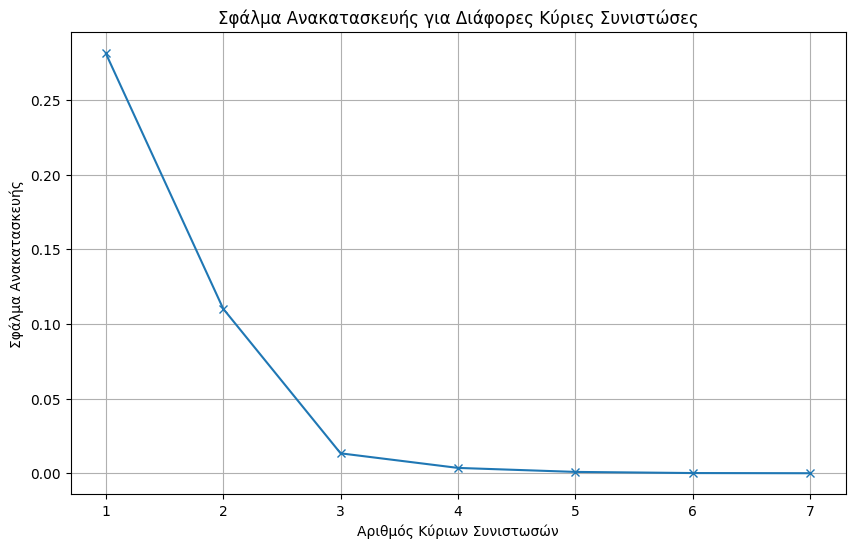

In [ ]:
import matplotlib.pyplot as plt

reconstruction_error = []

for n_components in range(1, 8):
    pca = PCA(n_components=n_components)
    pca.fit(data_normalized)
    data_reconstructed = pca.inverse_transform(pca.transform(data_normalized))
    error = np.mean(np.square(data_normalized - data_reconstructed))
    reconstruction_error.append(error)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 8), reconstruction_error, marker='x')
plt.title("Σφάλμα Ανακατασκευής για Διάφορες Κύριες Συνιστώσες")
plt.xlabel("Αριθμός Κύριων Συνιστωσών")
plt.ylabel("Σφάλμα Ανακατασκευής")
plt.xticks(range(1, 8))
plt.grid(True)
plt.show()

Σύμφωνα με το διάγραμμα του σφάλματος ανακατασκευής για τις διάφορες κύριες συνιστώσες, η αύξηση των κύριων συνιστωσών οδηγεί σε μείωση του σφάλματος, δηλαδή όσες περισσότερες διαστάσεις διατηρούμε, τόσο μικρότερο σφάλμα ανακατασκευής έχουμε, όπως ακριβώς αναμέναμε.

Αξιοσημείωτο είναι ότι η διατήρηση περισσότερων από 3 κύριων συνιστωσών δεν επιφέρει βελτίωση. Επομένως, τα δεδομένα μπορούν να ανακατασκευαστούν με το μικρότερο δυνατό σφάλμα και την μικρότερη πολυπλοκότητα εάν διατηρήσουμε τις 3 κύριες συνιστώσες.

# **ΕΡΩΤΗΜΑ Γ**

**Να εφαρμοστεί η μέθοδος LDA για την απεικόνιση του dataset σε 2 διαστάσεις. Να συγκρίνετε την απεικόνιση αυτή με την αντίστοιχη που παράγεται από τη μέθοδο PCA. Ποια τα κυριότερα ποιοτικά χαρακτηριστικά των απεικονίσεων που παράγουν οι δύο μέθοδοι και σε τι οφείλονται? Εξηγήστε.**

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2) # Επιλογή 2 διαστάσεων για απεικόνιση
lda_result = lda.fit_transform(data_normalized, labels)

# plt.figure()
# plt.scatter(lda_result[:, 0], lda_result[:, 1], c=labels, alpha=0.7, edgecolors='b')
# plt.title("Διάγραμμα LDA με 2 Διαστάσεις")
# plt.xlabel("1η κύρια συνιστώσα")
# plt.ylabel("2η κύρια συνιστώσα")
# plt.grid(True)
# plt.show()

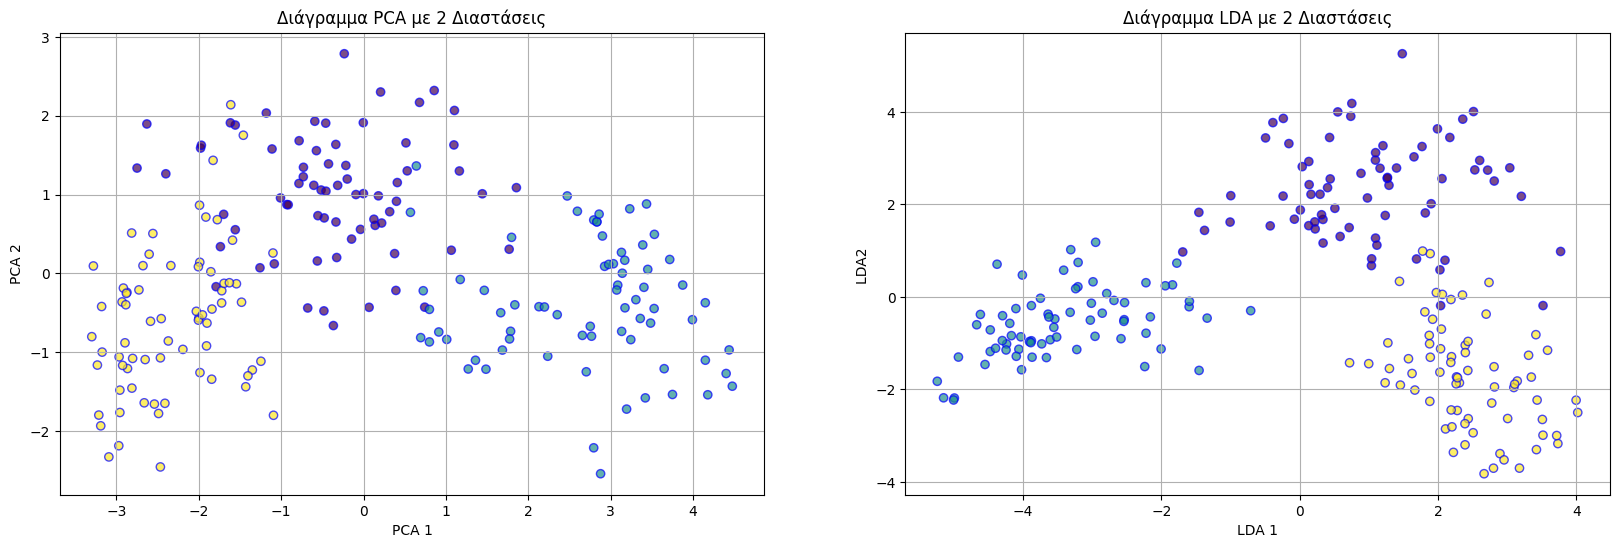

In [ ]:
pca = PCA(n_components=2) # Επιλογή 2 διαστάσεων για απεικόνιση
pca_result = pca.fit_transform(data_normalized)

plt.figure(figsize=(20, 6))

# Διάγραμμα PCA
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis', alpha=0.7, edgecolors='b')
plt.title("Διάγραμμα PCA με 2 Διαστάσεις")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)

# Διάγραμμα LDA
plt.subplot(1, 2, 2)
plt.scatter(lda_result[:, 0], lda_result[:, 1], c=labels, cmap='viridis', alpha=0.7, edgecolors='b')
plt.title("Διάγραμμα LDA με 2 Διαστάσεις")
plt.xlabel("LDA 1")
plt.ylabel("LDA2 ")
plt.grid(True)
plt.show()

Τα δύο διαγράμματα για την PCA και την LDA φαίνονται στην εικόνα 8. Η απεικόνιση με PCA, όπου οι κύριε συνιστώσες επιλέγονται ώστε να μεγιστοποιείται η διακύμανση, επικεντρώνεται στην ανάδειξη των δομικών πληροφοριών των δεδομένων. Αντίθετα, η απεικόνιση με LDA, όπου οι κύριες συνιστώσες επιλέγονται ώστε να διαχωρίζονται τα δεδομένα λαμβάνοντας υπόψιν τις ετικέτες, επικεντρώνεται στον όσο το δυνατό πιο καθαρό διαχωρισμό των δεδομένων. Συνεπώς, η PCA ενδείκνυται σε εφαρμογές για μείωση των διαστάσεων προς οπτικοποίηση των δομικών πληροφοριών δεδομένων, ενώ η LDA σε εφαρμογές ξεκάθαρου διαχωρισμού των δεδομένων δεδομένου των ετικετών τους.

# **ΕΡΩΤΗΜΑ Δ**

**Με βάση τον πίνακα προβολής που παράγεται από την LDA στο προηγούμενο ερώτημα, ποια είναι τα δύο χαρακτηριστικά (features) που συνεισφέρουν περισσότερο στη διάκριση μεταξύ των κλάσεων και ποια τα δύο που συνεισφέρουν λιγότερο απ’ όλα?**

**Δημιουργείστε δυο δυσδιάστατες απεικονίσεις των δεομένων χρησιμοποιώντας το καθένα από τα δύο ζεύγη χαρακτηριστικών που καταδείξατε. Σχολιάστε.**

In [ ]:
# Υπολογισμός συντελεστών
lda_coefficients = lda.coef_

# Ταξινόμηση συντελεστών ανάλογα με την απόλυτη τιμή τους στην πρώτη κύρια συνιστώσα της LDA
sorted_indices = np.argsort(np.mean(np.abs(lda_coefficients), axis=0))[::-1] # Φθίνουσα σειρά
# print(sorted_indices, "\n")

least_contributing_features = sorted_indices[-2:] # 2 χαρακτηριστικά με μέγιστη συνεισφορά
most_contributing_features = sorted_indices[:2]   # 2 χαρακτηριστικά με ελάχιστη συνεισφορά

print("Τα χαρακτηριστικά με την μεγαλύτερη συνεισφορά στην διάκριση είναι το ", most_contributing_features[0], " και το ", most_contributing_features[1], ".")
print("Τα χαρακτηριστικά με την μικρότερη συνεισφορά στην διάκριση είναι το ", least_contributing_features[1], " και το ", least_contributing_features[0], ".")

Τα χαρακτηριστικά με την μεγαλύτερη συνεισφορά στην διάκριση είναι το  1  και το  0 .
Τα χαρακτηριστικά με την μικρότερη συνεισφορά στην διάκριση είναι το  4  και το  5 .


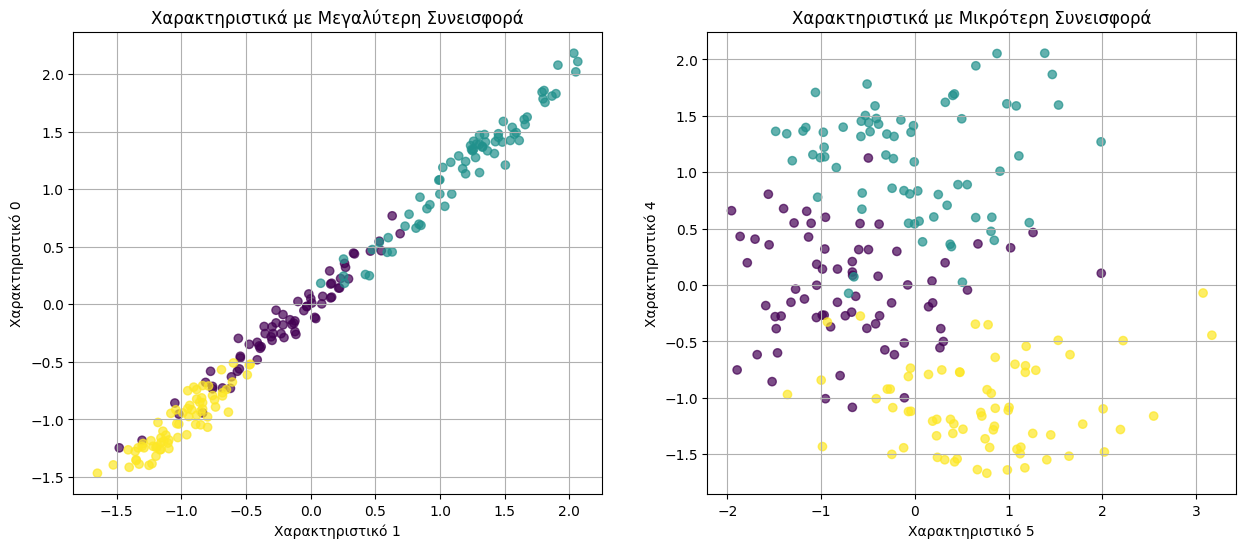

In [ ]:
# Διάγραμμα για τα δύο χαρακτηριστικά που συνεισφέρουν περισσότερο
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.scatter(data_normalized[:, most_contributing_features[0]], data_normalized[:, most_contributing_features[1]], c=labels, cmap='viridis', alpha=0.7)
plt.title("Χαρακτηριστικά με Μεγαλύτερη Συνεισφορά")
plt.xlabel("Χαρακτηριστικό " + str(most_contributing_features[0]))
plt.ylabel("Χαρακτηριστικό " + str(most_contributing_features[1]))
plt.grid(True)

# Διάγραμμα για τα δύο χαρακτηριστικά που συνεισφέρουν λιγότερο
plt.subplot(1, 2, 2)
plt.scatter(data_normalized[:, least_contributing_features[0]], data_normalized[:, least_contributing_features[1]], c=labels, cmap='viridis', alpha=0.7)
plt.title("Χαρακτηριστικά με Μικρότερη Συνεισφορά")
plt.xlabel("Χαρακτηριστικό " + str(least_contributing_features[0]))
plt.ylabel("Χαρακτηριστικό " + str(least_contributing_features[1]))
plt.grid(True)

plt.show()

Στα παραπάνω διαγράμματα απεικονίζονται δύο διαφορετικά ζεύγη χαρακτηριστικών από το dataset:

Αριστερό Διάγραμμα (Χαρακτηριστικά με Μεγαλύτερη Συνεισφορά): Εδώ βλέπουμε την απεικόνιση των δεδομένων χρησιμοποιώντας τα δύο χαρακτηριστικά που κατά την ανάλυση της LDA συνέβαλαν περισσότερο στη διάκριση των κλάσεων. Παρατηρούμε ότι οι διάφορες κατηγορίες (διαφορετικά χρώματα) διαχωρίζονται με μεγαλύτερη σαφήνεια σε αυτό το διάγραμμα.

Δεξί Διάγραμμα (Χαρακτηριστικά με Μικρότερη Συνεισφορά): Σε αυτό το διάγραμμα χρησιμοποιούνται τα δύο χαρακτηριστικά που κατά την ανάλυση της LDA φάνηκαν να συνεισφέρουν λιγότερο στη διάκριση των κλάσεων. Είναι εμφανές ότι ο διαχωρισμός των κλάσεων είναι λιγότερο ξεκάθαρος σε αυτό το διάγραμμα.

Συνοψίζοντας, τα χαρακτηριστικά που συνέβαλαν περισσότερο στην LDA παρέχουν έναν πιο σαφή διαχωρισμό μεταξύ των κλάσεων σε σύγκριση με τα χαρακτηριστικά που συνέβαλαν λιγότερο, υπογραμμίζοντας τη σημασία της επιλογής των κατάλληλων διαστάσεων για ανάλυση και οπτικοποίηση δεδομένων.

Τα χαρακτηριστικά με την μεγαλύτερη συνεισφορά στην διάκριση είναι το  2  και το  3 .
Τα χαρακτηριστικά με την μικρότερη συνεισφορά στην διάκριση είναι το  5  και το  4 .



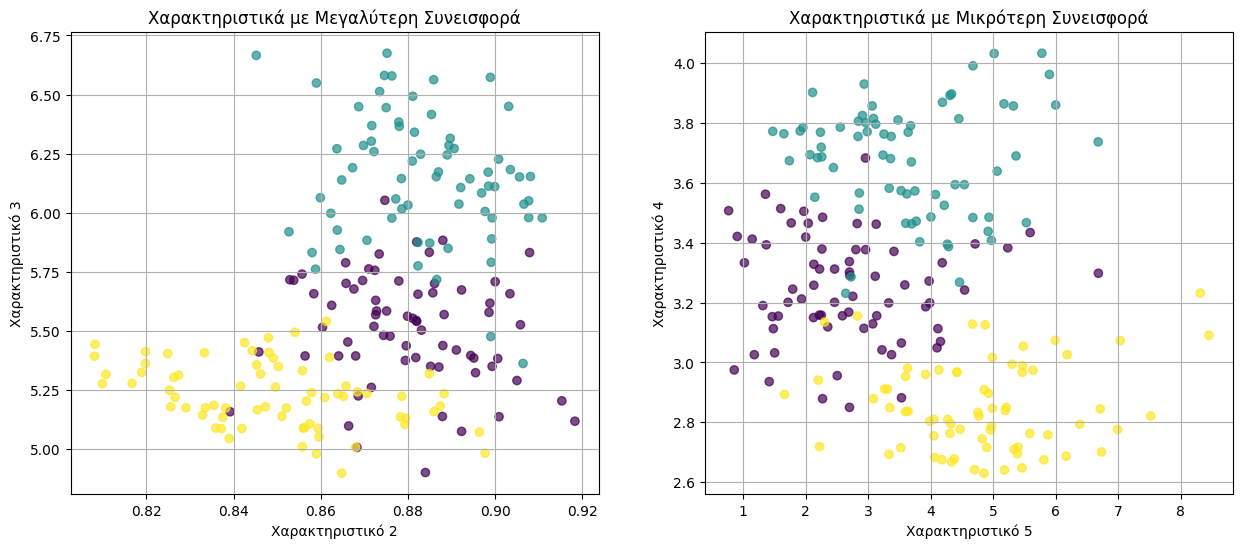

In [ ]:
# ------- ΜΗ ΚΑΝΟΝΙΚΟΠΟΙΗΜΕΝΑ ΔΕΔΟΜΕΝΑ -------
# Applying LDA
lda = LDA(n_components=2)
data_lda = lda.fit_transform(data, labels)

# Υπολογισμός συντελεστών
lda_coefficients = lda.coef_

# Ταξινόμηση συντελεστών ανάλογα με την απόλυτη τιμή τους στην πρώτη κύρια συνιστώσα της LDA
sorted_indices = np.argsort(np.mean(np.abs(lda_coefficients), axis=0))[::-1] # Αύξουσα σειρά

least_contributing_features = sorted_indices[-2:] # 2 χαρακτηριστικά με μέγιστη συνεισφορά
most_contributing_features = sorted_indices[:2]   # 2 χαρακτηριστικά με ελάχιστη συνεισφορά

print("Τα χαρακτηριστικά με την μεγαλύτερη συνεισφορά στην διάκριση είναι το ", most_contributing_features[0], " και το ", most_contributing_features[1], ".")
print("Τα χαρακτηριστικά με την μικρότερη συνεισφορά στην διάκριση είναι το ", least_contributing_features[1], " και το ", least_contributing_features[0], ".\n")

# Διάγραμμα για τα δύο χαρακτηριστικά που συνεισφέρουν περισσότερο
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.scatter(data[:, most_contributing_features[0]], data[:, most_contributing_features[1]], c=labels, cmap='viridis', alpha=0.7)
plt.title("Χαρακτηριστικά με Μεγαλύτερη Συνεισφορά")
plt.xlabel("Χαρακτηριστικό " + str(most_contributing_features[0]))
plt.ylabel("Χαρακτηριστικό " + str(most_contributing_features[1]))
plt.grid(True)

# Διάγραμμα για τα δύο χαρακτηριστικά που συνεισφέρουν λιγότερο
plt.subplot(1, 2, 2)
plt.scatter(data[:, least_contributing_features[1]], data[:, least_contributing_features[0]], c=labels, cmap='viridis', alpha=0.7)
plt.title("Χαρακτηριστικά με Μικρότερη Συνεισφορά")
plt.xlabel("Χαρακτηριστικό " + str(least_contributing_features[1]))
plt.ylabel("Χαρακτηριστικό " + str(least_contributing_features[0]))
plt.grid(True)

plt.show()